['B' 'CD14Mono' 'CD8T' 'DC' 'FCGR3A' 'IGHA' 'MemoryCD4T' 'NK' 'NaiveCD4T'
 'ZNF385D']


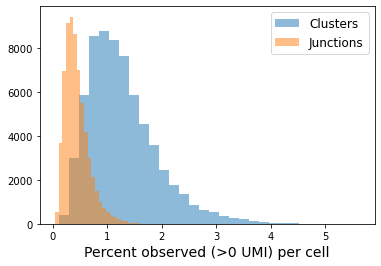

In [13]:
import pandas as pd
import numpy as np

import scipy.sparse as sp
import matplotlib.pyplot as plt
from load_cluster_data import load_cluster_data

from scipy.sparse import coo_matrix
def sparse_sum(x, dim):
    return np.squeeze(np.asarray(x.sum(dim)))

input_file = '/gpfs/commons/groups/knowles_lab/Karin/parse-pbmc-leafcutter/leafcutter/junctions/PBMC_input_for_LDA.h5'

final_data, coo_counts_sparse, coo_cluster_sparse, cell_ids_conversion, junction_ids_conversion = load_cluster_data(
    input_file)

summarized_data = pd.read_hdf(input_file, 'df')
cluster_data = summarized_data[["cell_id_index","Cluster","Cluster_Counts"]].drop_duplicates()
#summarized_data['cell_id_index'] = summarized_data.groupby('cell_id').ngroup()
#summarized_data['junction_id_index'] = summarized_data.groupby('junction_id').ngroup()


cluster_counts = sp.coo_matrix( (cluster_data.Cluster_Counts.values, (cluster_data.cell_id_index.values, cluster_data.Cluster.values) ))
to_keep = sparse_sum(cluster_counts,0) > 0
cluster_counts = cluster_counts.tocsr()[:,to_keep]
cluster_counts = cluster_counts.tocoo()
cluster_counts.data = np.ones_like(cluster_counts.data)
cell_clusters = sparse_sum(cluster_counts,1) 

junc_counts = final_data[final_data.junc_count > 0]
ind = (junc_counts['cell_id_index'].values, junc_counts['junction_id_index'].values)
junc_presence = sp.coo_matrix( (np.ones(junc_counts.shape[0]), ind ))

plt.hist(100 * cell_clusters / 11585, 30, alpha=0.5, label = "Clusters") 
plt.hist(100 * sparse_sum(junc_presence,1) / 38802, 30, alpha=0.5, label = "Junctions")
plt.xlabel("Percent observed (>0 UMI) per cell", fontsize=14)
plt.legend(fontsize=12)
#plt.savefig("percent_obs.pdf")


Text(0, 0.5, 'Frequency')

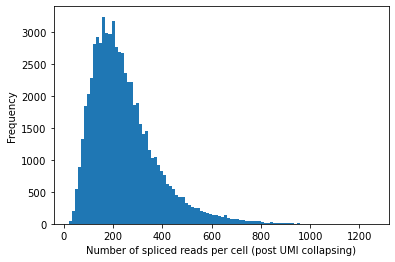

In [12]:
junc_sparse = sp.coo_matrix(
    (final_data.junc_count.values, 
     (final_data.cell_id_index.values, final_data.junction_id_index.values) ))

cell_tots = sparse_sum(junc_sparse, 1)
plt.hist(cell_tots, 100)
plt.xlabel("Number of spliced reads per cell (post UMI collapsing)")
plt.ylabel("Frequency")
#plt.savefig("reads_per_cell_hist.pdf")